In [5]:
import pandas as pd
# get the csv file
# /media/Volume/data/MIT-BHI/data/

# read the csv file
df = pd.read_csv('/media/Volume/data/MIT-BHI/data/t_wave_split/labels_train.csv')
# get the first index where is_oversampled is True

idx = df[df['is_oversampled'] == True].index[8]
print(idx)

# get the dataframe from the idx to next 10 rows
df['len'] = df['hb_end'] - df['hb_start']
df['win_size'] = df['win_end'] - df['win_start']

# subtract the win_start from the previous win_start
df['win_start_diff'] = df['win_start'].diff()
df['hb_len'] = df['hb_end'] - df['hb_start']

df.head(n = 10)
# get hte maximum win size
max_win_size = df['win_size'].max()
print(max_win_size)

# get the row where the win_size is maximum
max_win_size_row = df[df['win_size'] == max_win_size]
print(max_win_size_row)

369
3724
       patient  sample_id orig_label label  hb_start  hb_end  r_peak  \
47754      208       2104          Q     Q    458221  458655  458621   

       is_oversampled  win_start  win_end  len  win_size  win_start_diff  \
47754            True     458221   461945  434      3724          1400.0   

       hb_len  
47754     434  


In [6]:
# get the row where the win_start_diff is mainimum
min_win_start_diff = df['win_size'].min()
print(min_win_start_diff)
# get row at index 61323
row = df.loc[4978]
print(row)

446
patient             108
sample_id             4
orig_label            N
label                 N
hb_start           1268
hb_end             1597
r_peak             1493
is_oversampled    False
win_start             0
win_end            3293
len                 329
win_size           3293
win_start_diff      0.0
hb_len              329
Name: 4978, dtype: object


In [7]:
# load the model from checkpoint
from models.xLSTM import myxLSTM
import torch

#path = 'lightning_logs/version_9/checkpoints/epoch=2-step=8088.ckpt'
# path = 'lightning_logs/version_103/checkpoints/epoch=9-step=4760.ckpt'
path = 'pretrain-xLSTM/mop2okku/checkpoints/epoch=26-step=72792.ckpt'

xlstm = myxLSTM(patch_size=64, dropout=0.1, embedding_dim=128, activation_fn='relu', xlstm_depth=5)
checkpoint = torch.load(path)
print(checkpoint.keys())
print(checkpoint['hyper_parameters'])
state_dict = checkpoint['state_dict']
# Remove 'model.' prefix from keys
new_state_dict = {k.replace('model.', ''): v for k, v in state_dict.items()}
print(new_state_dict.keys())
xlstm.load_state_dict(new_state_dict, strict=False)
xlstm.eval()


flattened_size 6656
dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])
{'lr': 0.0008500887456150316, 'batch_size': 128, 'optimizer': 'adamw', 'wd': 0.0006178282652583289, 'use_scheduler': True}
dict_keys(['sep_token', 'encoder.0.weight', 'encoder.0.bias', 'encoder.2.weight', 'encoder.2.bias', 'encoder.4.weight', 'encoder.4.bias', 'encoder.6.weight', 'encoder.6.bias', 'encoder.8.weight', 'encoder.8.bias', 'encoder.10.weight', 'encoder.10.bias', 'down_project.weight', 'down_project.bias', 'xlstm.blocks.0.xlstm_norm.weight', 'xlstm.blocks.0.xlstm.learnable_skip', 'xlstm.blocks.0.xlstm.proj_up.weight', 'xlstm.blocks.0.xlstm.q_proj.weight', 'xlstm.blocks.0.xlstm.k_proj.weight', 'xlstm.blocks.0.xlstm.v_proj.weight', 'xlstm.blocks.0.xlstm.conv1d.conv.weight', 'xlstm.blocks.0.xlstm.conv1d.conv.bias', 'xlstm.blocks.0.xlstm.mlstm_cell.igate.weight', 'xlstm.blocks.0.xlstm.mls

/home/luna97/Research/MIT-BIH_ecg_arrhytmia/mit_bih_env/lib/python3.11/site-packages/xlstm/blocks/slstm/cell.py:543: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @conditional_decorator(
/home/luna97/Research/MIT-BIH_ecg_arrhytmia/mit_bih_env/lib/python3.11/site-packages/xlstm/blocks/slstm/cell.py:568: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @conditional_decorator(
/tmp/ipykernel_1131258/2178448740.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weigh

myxLSTM(
  (dropout): Dropout(p=0.1, inplace=False)
  (activation): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (patch_embedding): Conv1d(1, 128, kernel_size=(64,), stride=(64,))
  (encoder): Sequential(
    (0): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (1): ReLU()
    (2): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv1d(32, 64, kernel_size=(5,), stride=(1,))
    (5): ReLU()
    (6): LayerNorm((56,), eps=1e-05, elementwise_affine=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): Conv1d(64, 128, kernel_size=(5,), stride=(1,))
    (9): ReLU()
    (10): LayerNorm((52,), eps=1e-05, elementwise_affine=True)
    (11): Dropout(p=0.1, inplace=False)
  )
  (down_project): Linear(in_features=6656, out_features=128, bias=True)
  (xlstm): xLSTMBlockStack(
    (blocks): ModuleList(
      (0): mLSTMBlock(
        (xlstm_norm): LayerNorm()
        (xlstm): mLSTMLayer(
          (p

2
sample shape torch.Size([3600, 1, 1])
rec shape torch.Size([1, 56, 64])
sample shape torch.Size([1, 3600])
x shape torch.Size([1, 56, 1, 64])
shift_x shape torch.Size([56, 64])
rec shape torch.Size([1, 3584])
shift_x shape torch.Size([1, 3584])


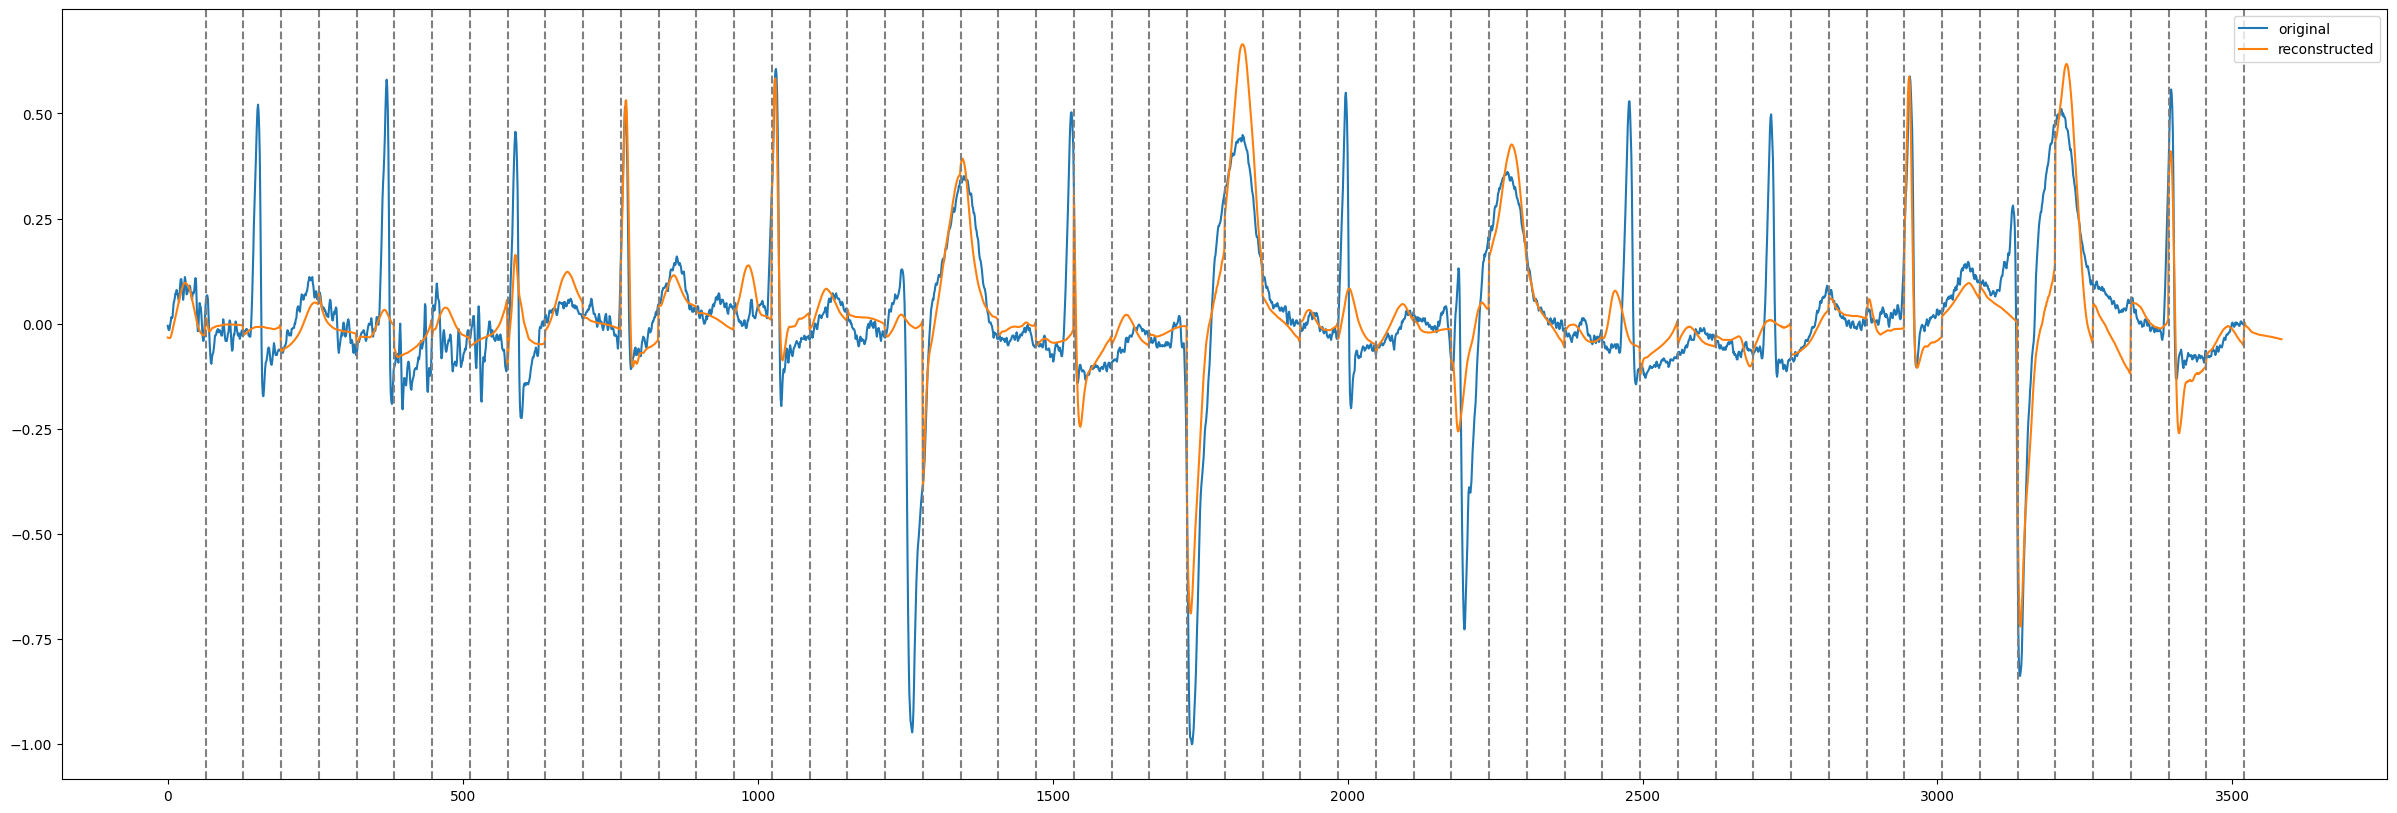

In [8]:
# get one sample from the dataset
import numpy as np
from torch.utils.data import DataLoader

from dataset.mit_bih import ECGMITBIHDataset
dataset = ECGMITBIHDataset('/media/Volume/data/MIT-BHI/data/', subset='test', num_leads=1, oversample=False, random_shift=False, patch_size=64, normalize=True, nkclean=False)

xlstm = xlstm.to('cuda')
xlstm.eval()
# idx with V: 16799
# get test dataset
sample = dataset[16799]
print(sample['label'])
sample = sample['signal'].to('cuda')
print('sample shape', sample.shape)
sample = sample.squeeze().unsqueeze(0)

reconstruct = xlstm.reconstruct(sample) # [batch_size, seq_len // 64, patch_size]
print('rec shape', reconstruct.shape)
print('sample shape', sample.shape)
shift_reconstruct = reconstruct[:, :]
x, _, _ = xlstm.seq_to_token(sample)
shift_x = x.squeeze()
print('x shape', x.shape)
print('shift_x shape', shift_x.shape)

# try to reconstruct one element at a time
reconstruct = reconstruct.view(1, -1)
shift_x = shift_x.view(1, -1)
print('rec shape', reconstruct.shape)
print('shift_x shape', shift_x.shape)


# plot the original and reconstructed signal
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
plt.plot(shift_x[:, 64:].squeeze().cpu().numpy(), label='original')
plt.plot(reconstruct[0].squeeze().detach().cpu().numpy(), label='reconstructed')
# add a pipe avery 64 samples
for i in range(1, 3600 // 64):
    plt.axvline(x=64*i, color='gray', linestyle='--')
plt.legend()



sample shape torch.Size([1, 3600])


prediction_tokens shape torch.Size([1, 50, 64])
predictions shape torch.Size([3200])


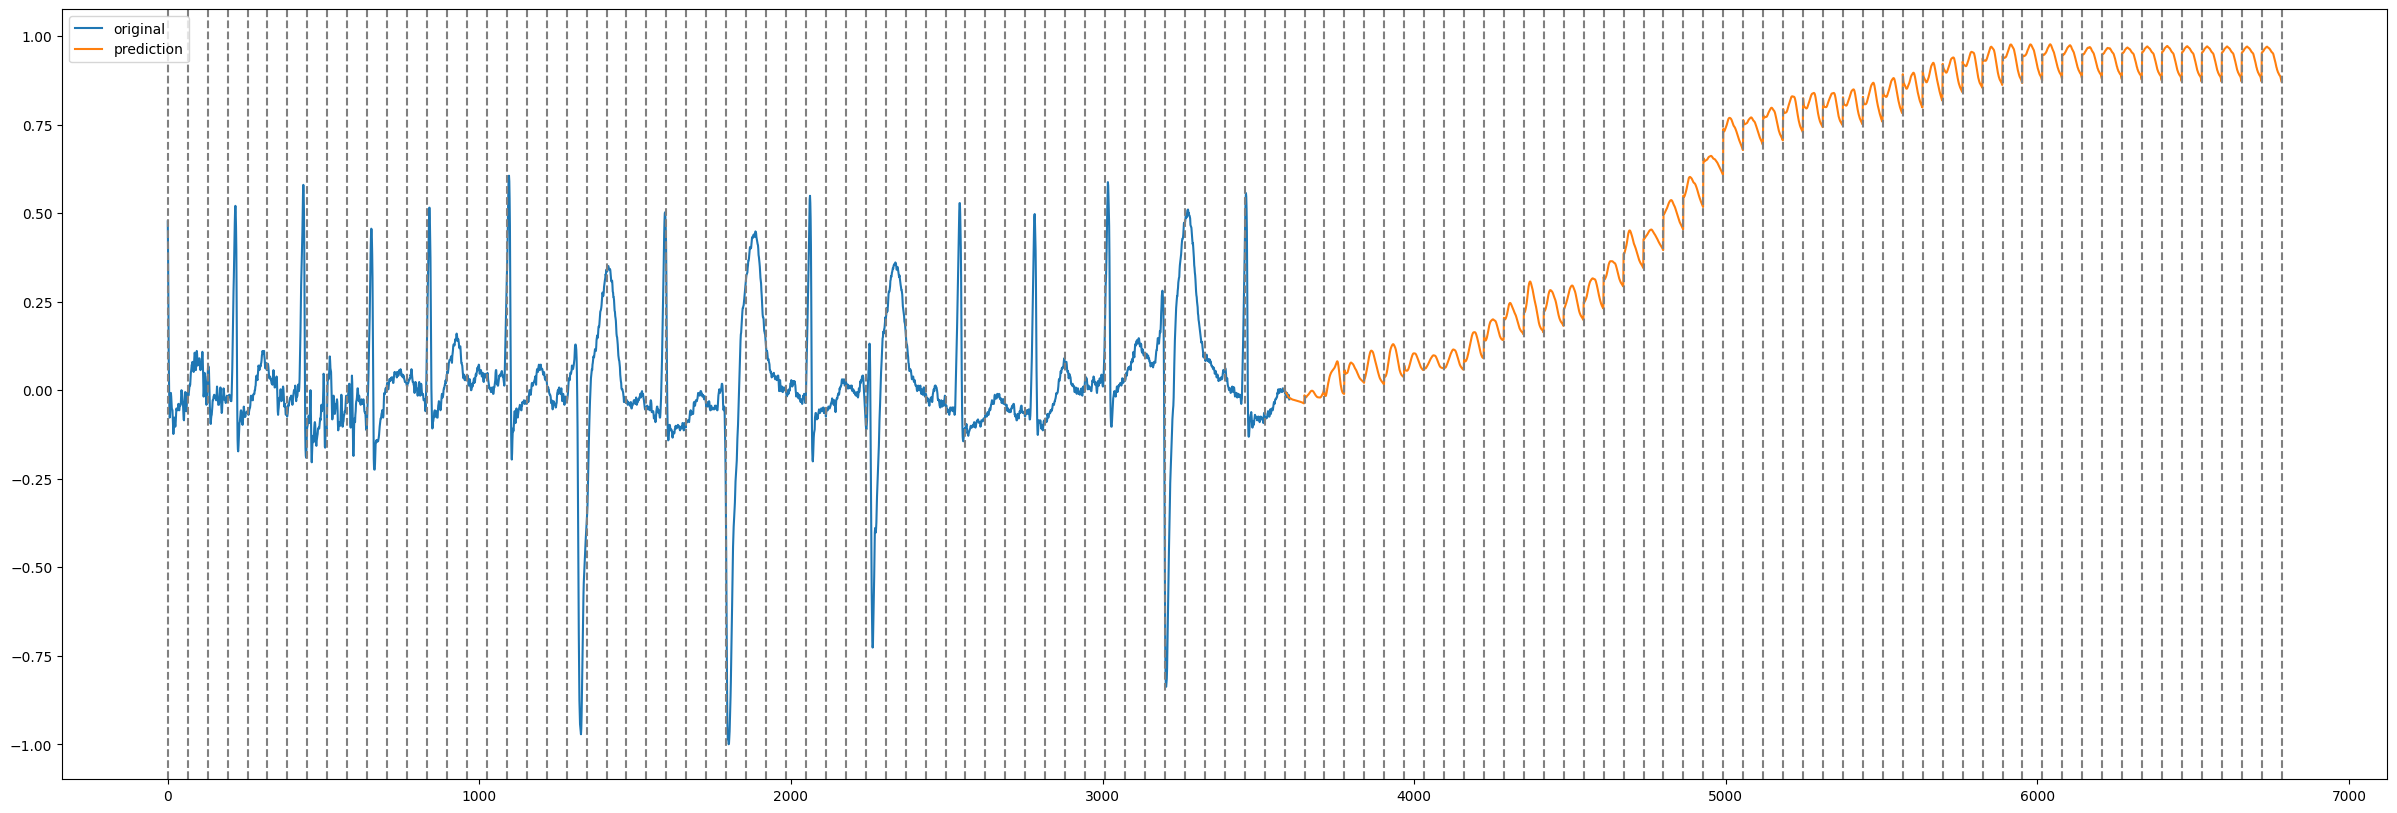

In [9]:
# given the sample predict a new signal

# get the prediction
print('sample shape', sample.shape)
prediction_tokens = torch.zeros([1, 0, 64]).to('cuda')
for i in range(0, 50):
    if i == 0:
        new_sample = sample
    else:
        flatten_preds = prediction_tokens.view(1, -1)
        new_sample = torch.cat([sample, flatten_preds], dim=1)
    reconstruct = xlstm.reconstruct(new_sample)
    # the last token is the prediction
    prediction = reconstruct[:, -1, :]
    # print('prediction shape', prediction.unsqueeze(1).shape)
    # print('prediction_tokens shape', prediction_tokens.shape)
    prediction_tokens = torch.cat([prediction_tokens, prediction.unsqueeze(1)], dim=1)
    # print('prediction_tokens shape', prediction_tokens.shape)

print('prediction_tokens shape', prediction_tokens.shape)
predictions = prediction_tokens.squeeze().view(-1)
print('predictions shape', predictions.shape)

rest = len(sample[0]) % 64
# plot the signal
plt.figure(figsize=(30, 10))
plt.plot(sample[0, :].squeeze().cpu().numpy(), label='original')
plt.plot(range(len(sample[0, :-rest]), len(sample[0, :-rest]) + len(predictions)), predictions.detach().cpu().numpy(), label='prediction')
# add a pipe avery 64 samples
for i in range(0, (len(sample[0]) + len(predictions)) // 64 + 1):
   plt.axvline(x=64*i, color='gray', linestyle='--')
plt.legend()

In [10]:
import dataset.mit_bih as mit_bih
import dataset.code_15 as code_15
d1 = ECGMITBIHDataset('/media/Volume/data/MIT-BHI/data/', subset='test', num_leads=1, oversample=False, random_shift=False, patch_size=64, normalize=True)
dataloader1 = DataLoader(d1, batch_size=32, shuffle=False, collate_fn=mit_bih.collate_fn)
dataloader2 = DataLoader(d1, batch_size=32, shuffle=False, collate_fn=code_15.collate_fn)

print('dataloader1')
print(next(iter(dataloader1))['signal'].shape)
print('dataloader2')
print(next(iter(dataloader2))['signal'].shape)

dataloader1
torch.Size([32, 3600])
dataloader2
torch.Size([32, 3600])


loaded 345073 records
torch.Size([2636])


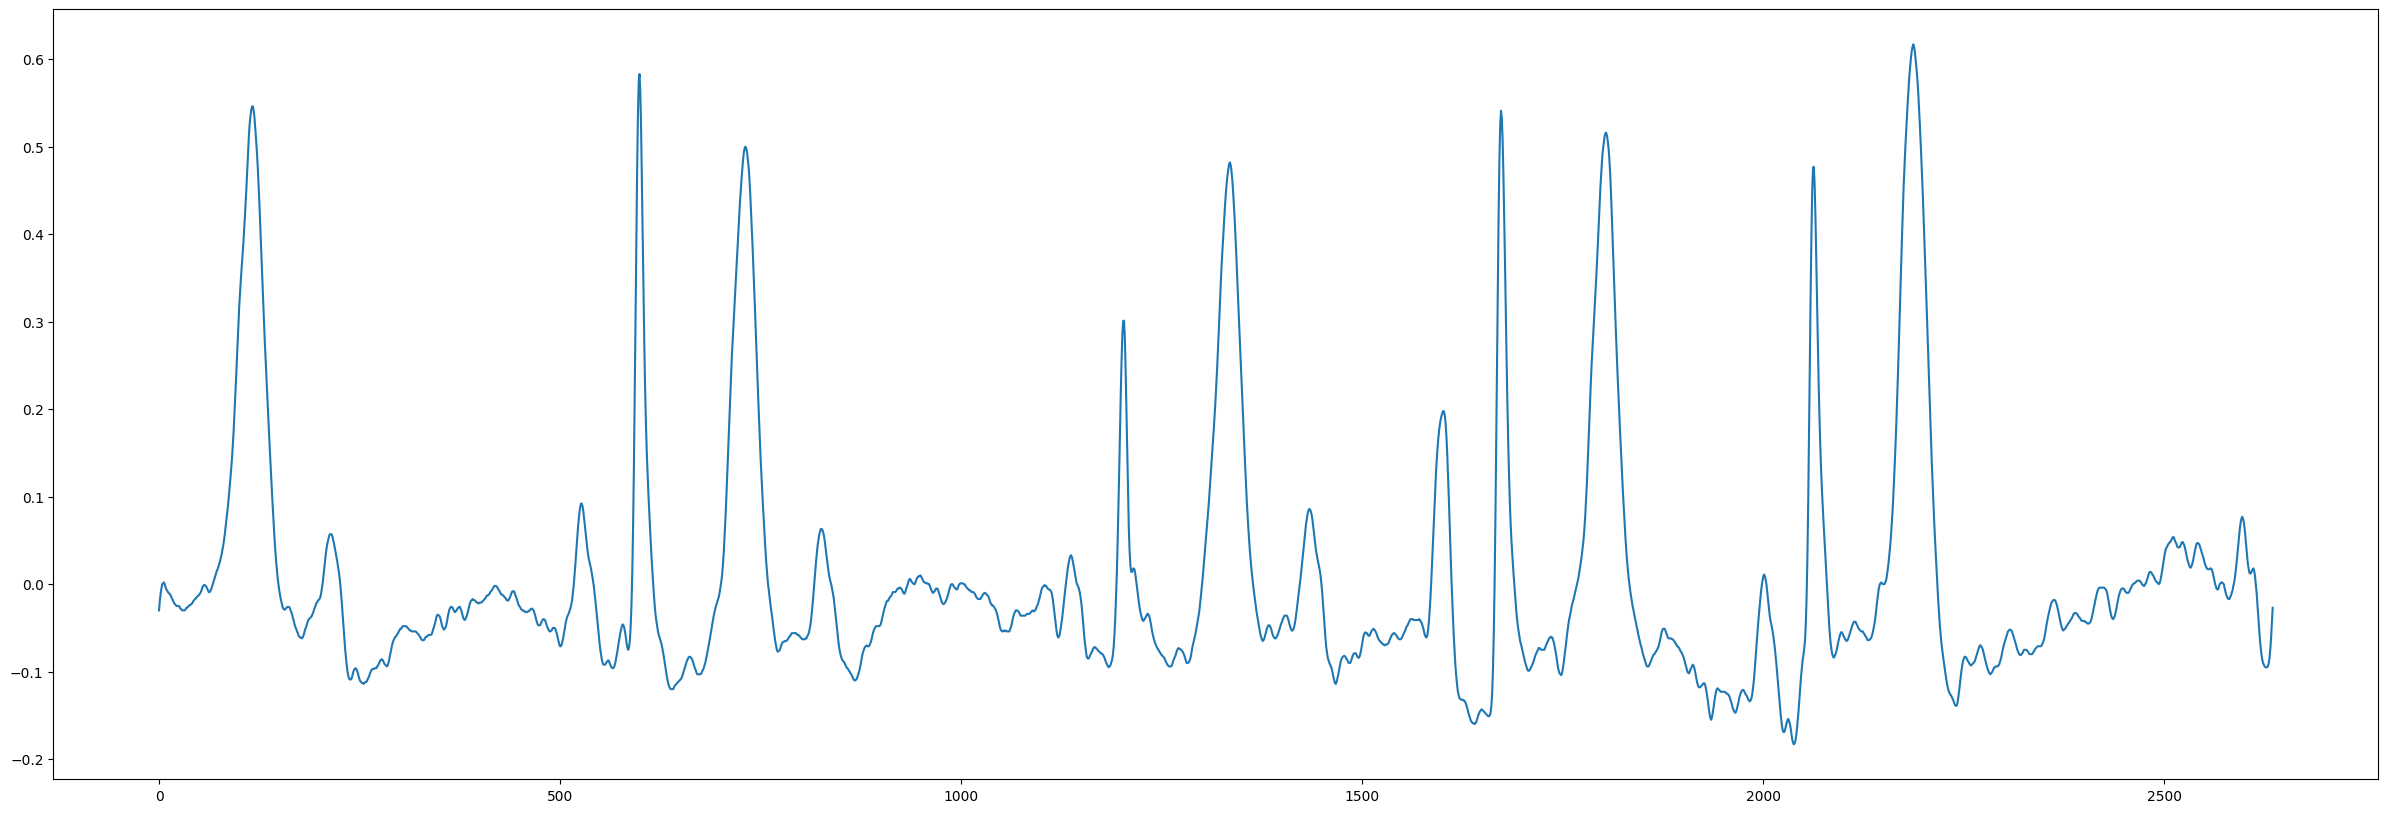

In [11]:
import dataset.code_15 as code_15
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt    

train_dataset = code_15.ECGCODE15Dataset('/media/Volume/data/CODE15/unlabeled_records_360_nkclean', num_leads=12, random_shift=True, patch_size=64, normalize=False)

# plot the first sample

sample = train_dataset[0]
sample = sample['signal']
print(sample.shape)
plt.figure(figsize=(30, 10))
plt.plot(sample.squeeze().numpy())



In [12]:
from matplotlib import pyplot as plt    

train_dataset = code_15.ECGCODE15Dataset('/media/Volume/data/CODE15/unlabeled_records_360', num_leads=12, random_shift=False, patch_size=64, normalize=False)
train_original = code_15.ECGCODE15Dataset('/media/Volume/data/CODE15/unlabeled_records', num_leads=12, random_shift=False, patch_size=64, normalize=False)

# plot the first sample


loaded 345073 records
loaded 345109 records


torch.Size([2636])


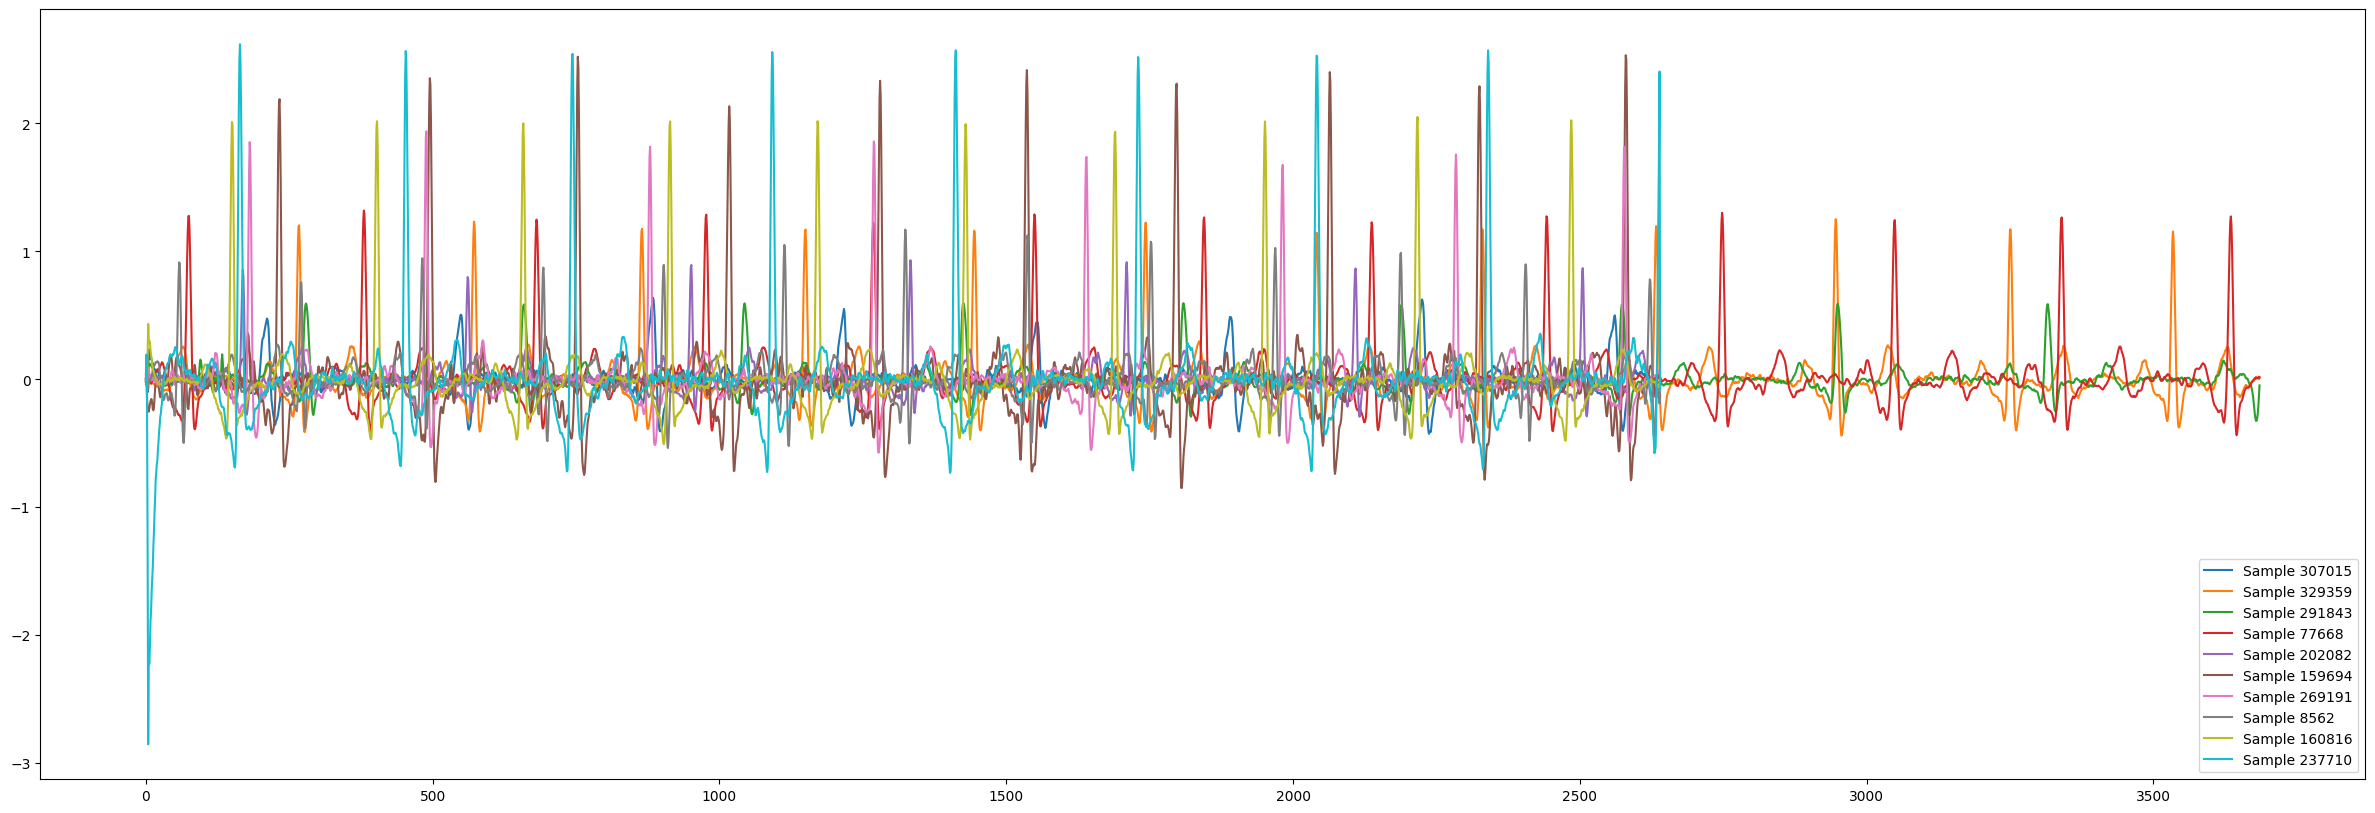

In [13]:
from scipy.signal import butter, lfilter
import torch 

class BandPassFilter(torch.nn.Module):
    def __init__(self, low_cutoff=0.5, high_cutoff=60, sampling_rate=400):
        super().__init__()
        self.low_cutoff = low_cutoff
        self.high_cutoff = high_cutoff
        self.sampling_rate = sampling_rate

        nyquist = 0.5 * sampling_rate
        low = low_cutoff / nyquist
        high = high_cutoff / nyquist
        b, a = butter(N=4, Wn=[low, high], btype='band')
        self.b = b
        self.a = a

    def forward(self, signal):
        if isinstance(signal, torch.Tensor):
            signal = signal.numpy()
        filtered_signal = torch.tensor(
            np.array([lfilter(self.b, self.a, channel) for channel in signal]),
            dtype=torch.float32
        )
        return filtered_signal

# print 10 random samples
import numpy as np
import neurokit2 as nk
idxs = np.random.randint(0, len(train_dataset), 10)
plt.figure(figsize=(30, 10))
print(sample.shape)
filter = BandPassFilter()
for idx in idxs:
    sample = train_dataset[idx]
    sample = sample['signal'] 
    #sample = filter(sample.unsqueeze(1))
    #print(sample.shape)
    # sample = sample - sample.mean()
    sample = nk.ecg_clean(sample, sampling_rate=360, method='vg')
    # apply band pass filterng
    plt.plot(sample.squeeze(), label=f'Sample {idx}')
plt.legend()


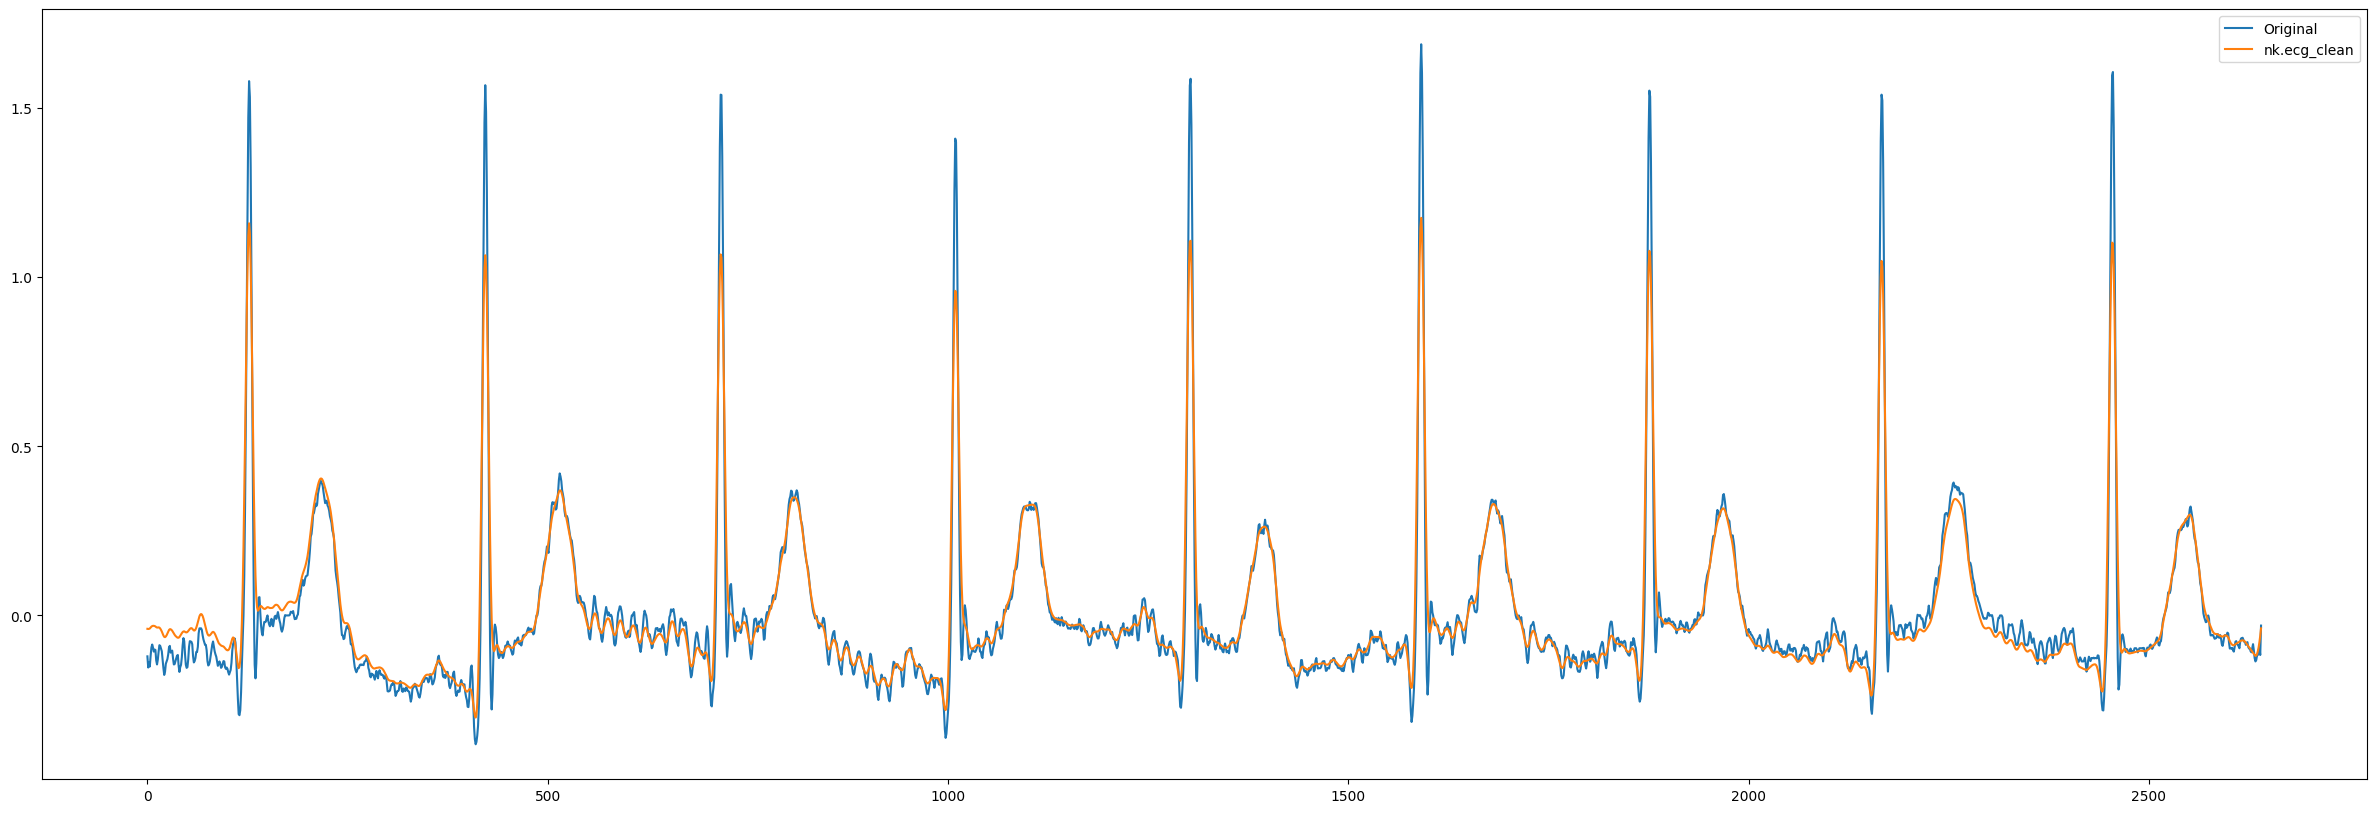

In [14]:
# compare different types of cleaning
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

# get the first sample
sample = train_dataset[3]
sample = sample['signal']
# apply nk.ecg_clean
cleaned_sample = nk.ecg_clean(sample[:], sampling_rate=360, method='nk')
# apply nk.ecg_clean
vg_cleaned_sample = nk.ecg_clean(sample[:], sampling_rate=360, method='vg')

engzeemod2012_cleaned_sample = nk.ecg_clean(sample[:], sampling_rate=360, method='engzeemod2012') 

filter = BandPassFilter(low_cutoff=0.5, high_cutoff=60, sampling_rate=360)
sample_bp = filter(sample.unsqueeze(0))



plt.figure(figsize=(30, 10))
plt.plot(sample[:].squeeze(), label='Original')
plt.plot(cleaned_sample.squeeze(), label='nk.ecg_clean')
# plt.plot(sample_bp.squeeze(), label='sample_bp')
# lt.plot(vg_cleaned_sample.squeeze(), label='vg.ecg_clean')
# plt.plot(engzeemod2012_cleaned_sample.squeeze(), label='engzeemod2012.ecg_clean')
# plt.plot(cleaned_sample.squeeze(), label='Band pass filter')
plt.legend()


torch.Size([4096])


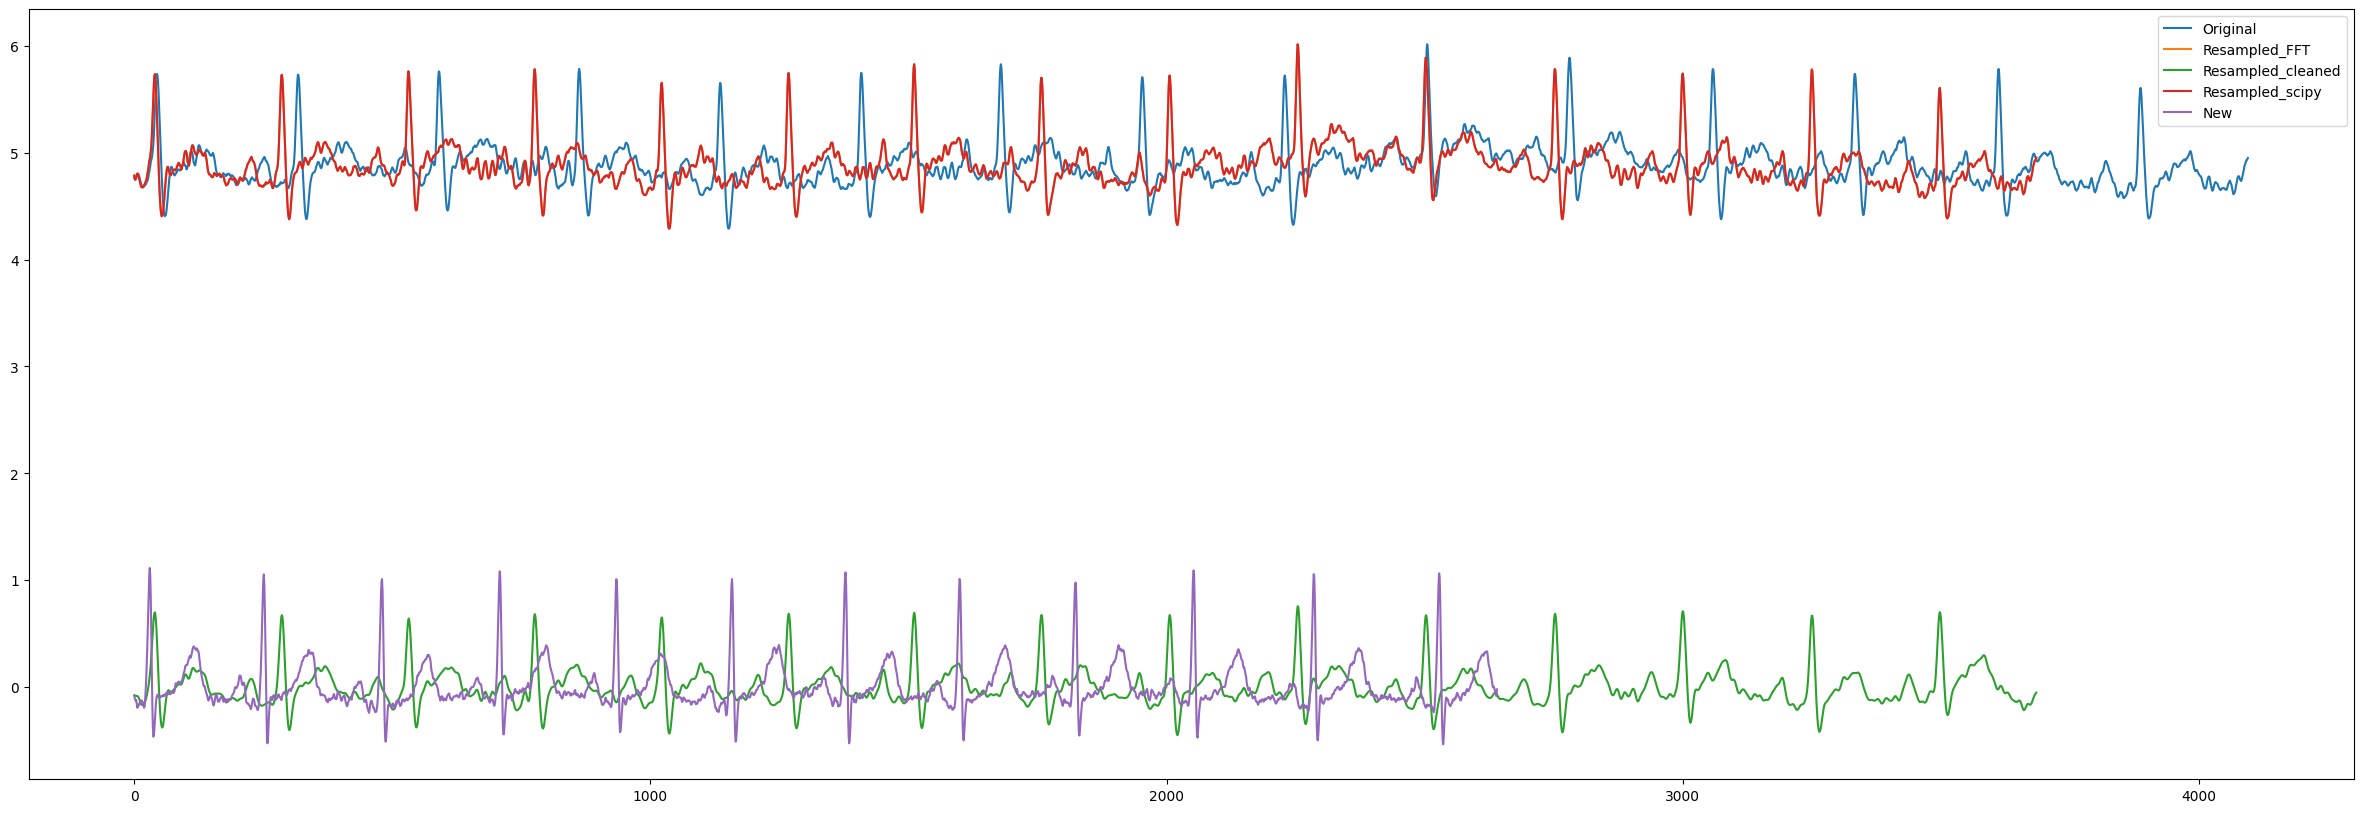

In [15]:
idx = 9878
sample_orig = train_original[idx]['signal'][:, 1]
sample_new = train_dataset[idx]['signal']
print(sample_orig.shape)
plt.figure(figsize=(30, 10))
plt.plot(sample_orig, label='Original')


resampled = nk.signal_resample(sample_orig, sampling_rate=400, desired_sampling_rate=360, method='FFT')
plt.plot(resampled, label='Resampled_FFT')
resampled = nk.signal_resample(sample_orig, sampling_rate=400, desired_sampling_rate=360, method='FFT')
resampled = nk.ecg_clean(resampled, sampling_rate=360, method='nk')
plt.plot(resampled, label='Resampled_cleaned')
#scipy resample
from scipy.signal import resample
resampled = resample(sample_orig, len(sample_orig) * 360 // 400)
plt.plot(resampled, label='Resampled_scipy')

plt.plot(sample_new, label='New')   

plt.legend()


In [ ]:
from models import PatchEmbedding as pe

patch_size = 64
patch = pe.PatchEmbedding(patch_size=patch_size, num_hiddens=256)
sample = train_dataset[0]['signal']
patched = patch(sample.unsqueeze(0).unsqueeze(0))
print(patched.shape)

tokenized, _, _ = xlstm.seq_to_token(sample.unsqueeze(0))
print(tokenized.shape)


X shape torch.Size([1, 1, 2641])
torch.Size([1, 41, 256])
torch.Size([1, 41, 1, 64])


ImportError: cannot import name 'Pat' from 'torch.nn' (/home/luna97/Research/MIT-BIH_ecg_arrhytmia/mit_bih_env/lib/python3.11/site-packages/torch/nn/__init__.py)

In [28]:
t = torch.randn(1, 3600, 1)
t2 = torch.randn(1, 3600, 1)

torch.rnn.pad_sequence([t, t2], batch_first=True, padding_value=0)

AttributeError: module 'torch' has no attribute 'rnn'